# <span style='color:#2916F5'> Importaing Libraries </span>

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,accuracy_score

# <span style='color:#2916F5'> Data Reading </span>

## <span style='color:#2916F5'>Loading Data </span>

In [3]:
##pip install plotly

In [4]:
diab=pd.read_csv("diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <span style='color:#2916F5'>Formatting Target label </span>

In [5]:
diab.Outcome=diab.Outcome.replace(diab.Outcome.unique(),["Diabetic","Non-Diabetic"])
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


## <span style='color:#2916F5'>Data Information </span>

In [6]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [7]:
diab.Outcome.value_counts()

Non-Diabetic    500
Diabetic        268
Name: Outcome, dtype: int64

## <span style='color:#2916F5'>Determining Missing Values</span>

In [8]:
diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# <span style='color:#2916F5'> Data Analysis and Visualization </span>

In [9]:
txtcol="#046307"
tcol=["#228B22","#2916F5"]

## <span style='color:#2916F5'>Function to Create Chart</span>

In [10]:
def create_chart(df,v1,v2,ctp):
    pd.crosstab(df[v1],df[v2]).plot(kind=ctp,figsize=(9,4),color=tcol)
    plt.title('Posibility of Diabetes by {}'.format(v1), fontsize=15,color=txtcol)
    plt.xlabel('{}'.format(v1), fontsize=12,color=txtcol)
    plt.ylabel('Count', fontsize=12,color=txtcol)
    plt.grid()
    plt.show()

## <span style='color:#2916F5'>Function to Create Bar Chart</span>

In [11]:
def create_bar(df1,df2,v1):
    avg1=df1[v1].mean()
    avg2=df2[v1].mean()
    cat=["Diabetic","Non-Diabetic"]
    val=[avg1,avg2]
    plt.figure(figsize=(6,4))
    plt.title("Average {} of Diabetic and Non-Diabetic People".format(v1),fontsize=18,color=txtcol)
    plt.xlabel("Type",fontsize=18,color=txtcol)
    plt.ylabel("Average {}".format(v1),fontsize=18,color=txtcol)
    plt.bar(cat,val,color=tcol)
    plt.grid()
    plt.show()

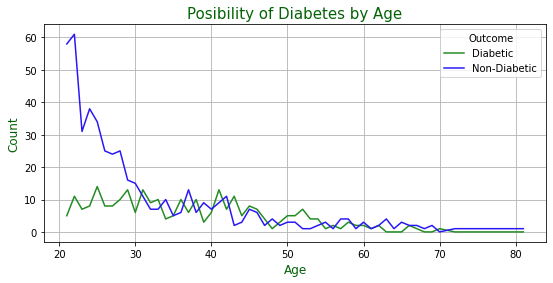

In [13]:
create_chart(diab,"Age","Outcome","line")
#Diabetic attacks are high between 40-50years age

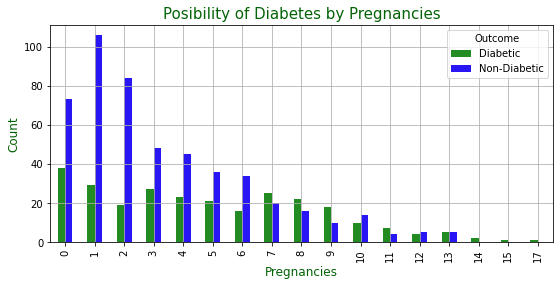

In [14]:
create_chart(diab,"Pregnancies","Outcome","bar")

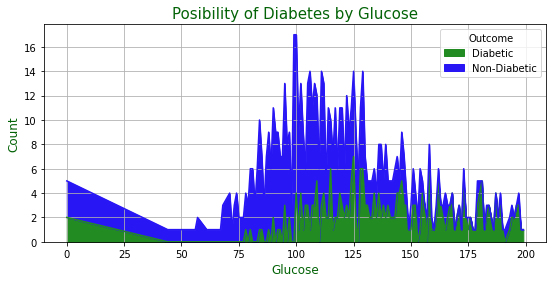

In [15]:
create_chart(diab,"Glucose","Outcome","area")
#maximum diabetic attacks are between 120-150

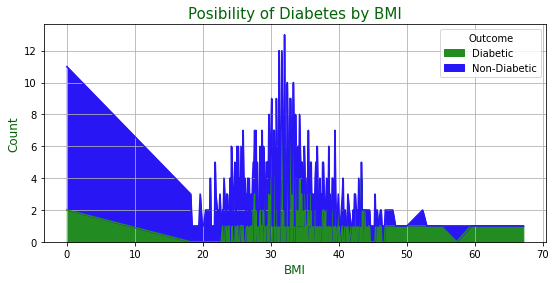

In [16]:
create_chart(diab,"BMI","Outcome","area")
#maximum diabetic attacks are between 30-50

In [ ]:
dbp=diab[diab['Outcome']=="Diabetic"]
ndbp=diab[diab['Outcome']=="Non-Diabetic"]

In [ ]:
create_bar(dbp,ndbp,"Age")
#average age for diabetic is 37

In [ ]:
create_bar(dbp,ndbp,"Glucose")
#average glucose for dbp is 140 and ndbp is 110

In [ ]:
create_bar(dbp,ndbp,"BMI")
#average BMI for dbp is 35 and ndbp is 30

In [ ]:
create_bar(dbp,ndbp,"Insulin")
#average Insulin for dbp is 100 and ndbp is 70

## <span style='color:#2916F5'>Diabetes Detection</span>

### <span style='color:#2916F5'>Feature Selection</span>

In [ ]:
diab1=diab.copy()
diab1['Outcome']=diab1['Outcome'].replace(diab1['Outcome'].unique(),[i+1 for i in range(len(diab1['Outcome'].unique()))])
crdiab=diab1.corr()
plt.figure(figsize=(10,6))
plt.title("Correlation Heatmap of Features", fontsize=22,color="#F6BE00")
sns.heatmap(crdiab,annot=True ,cmap='YlOrRd',fmt='.3f',linewidths=1)
plt.show()

In [ ]:
selected=crdiab['Outcome'].sort_values()[:-3].index.tolist()
print("Selected Features:\n",*selected, sep="\n")

### <span style='color:#2916F5'>Initiating Predictors and Target Feature and Split the data</span>

In [ ]:
X=diab[selected]
y=diab['Outcome']

x_train,x_test,y_train,y_test=train_test_split(X,y, train_size=0.8, random_state=10)
print("===========================================================")
print("==================== Data Splitting =======================")
print("\tSplit Ratio (Train : Test): {}% : {}%".format(round((len(x_train)/len(X))*100),round((len(x_test)/len(X))*100)))
print("===========================================================")
print("\t            Train Set: {}".format(round(len(X)*(0.8))))
print("\t            Test Set: {}".format(round(len(X)*(1-0.8))))
print("===========================================================")

### <span style='color:#2916F5'>Diabetes Detection using ML</span>

In [ ]:
clf_diab=[
    MLPClassifier(hidden_layer_sizes=(80,),activation='relu',solver="sgd",learning_rate="adaptive",learning_rate_init=0.0001),
    LogisticRegression(penalty="elasticnet",solver="saga",tol=0.0004, C=0.6,l1_ratio=0.8),
    AdaBoostClassifier(n_estimators=100,learning_rate=0.9),
    DecisionTreeClassifier(criterion='gini',max_features='sqrt',splitter='best',min_samples_split=4,max_depth=12),
    make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=0.001)),
]

In [ ]:
clf_diab_names=[
    "MLP Classifier",
    "Logistic Regression",
    "Adaptive Boosting Classifier",
    "Decision Tree Classifier",
    "Support Vector Machine"
]

In [ ]:
diabperf=[[],[],[],[]]
backupscvores1=[]
print("_____________________________________________________________________________")
for i in range(len(clf_diab)):
    print("                            {} ".format(clf_diab_names[i]))
    print("_____________________________________________________________________________")
    cvscore=[[],[],[],[],[],[]]
    for ts in range(10):
        clf_diab[i].fit(x_train,y_train)
        y_pred=clf_diab[i].predict(x_test)
        cvscore[0].append(round(accuracy_score(y_test,y_pred)*100,2))
        cvscore[1].append(round(precision_score(y_test, y_pred, average='weighted'),2)*100)
        cvscore[2].append(round(recall_score(y_test, y_pred, average='weighted'),2)*100)
        cvscore[3].append(round(f1_score(y_test, y_pred, average='weighted'),2)*100)
        cm=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
        cvscore[4].append(cm.iloc[:2,:2])
        cvscore[5].append(classification_report(y_test, y_pred))
    backupscvores1.append(cvscore[0])
    mxaccidx=cvscore[0].index(max(cvscore[0]))
    diabperf[0].append(cvscore[0][mxaccidx])
    diabperf[1].append(cvscore[1][mxaccidx])
    diabperf[2].append(cvscore[2][mxaccidx])
    diabperf[3].append(cvscore[3][mxaccidx])
    print("\nAccuracy: {}%\n".format(cvscore[0][mxaccidx]))
    print("\nClassification Report for {} \n\n{}".format(clf_diab_names[i],cvscore[5][mxaccidx]))
    print("\nConfusion Matrix for {} \n\n{}\n".format(clf_diab_names[i],cvscore[4][mxaccidx]))
    print("_____________________________________________________________________________")

### <span style='color:#2916F5'>Performance Comparison for Normal Data</span>

In [ ]:
diab_df=pd.DataFrame({
    "Classifiers":clf_diab_names,
    "Accuracy":diabperf[0],
    "Precision":diabperf[1],
    "Recall":diabperf[2],
    "F1-Score":diabperf[3]
})

for i in diab_df.columns.tolist()[1:]:
    diab_df=diab_df.sort_values(by=i,ascending=False)
    fig = px.bar(diab_df, y=i, x="Classifiers",text=i,color="Classifiers",
                 title="Comparison of {}".format(i),height=600,width=1000)
    fig.update_layout(
        font=dict(
            family="Times New Roman, Bold",
            size=20,
            color="black"
        )
    )
    fig.show()
diab_df.to_csv("diab_df.csv")

## <span style='color:#2916F5'>Experimenting Using Resampled Data</span>

In [ ]:
diabres=resample(diab, replace = True, n_samples = len(diab)*10, random_state = 10)
print(diabres.shape)

In [ ]:
X1=diabres[selected]
y1=diabres['Outcome']

x_train1,x_test1,y_train1,y_test1=train_test_split(X1,y1, train_size=0.8, random_state=10)
print("===========================================================")
print("==================== Data Splitting =======================")
print("\tSplit Ratio (Train : Test): {}% : {}%".format(round((len(x_train1)/len(X1))*100),round((len(x_test1)/len(X1))*100)))
print("===========================================================")
print("\t            Train Set: {}".format(round(len(X1)*(0.8))))
print("\t            Test Set: {}".format(round(len(X1)*(1-0.8))))
print("===========================================================")

In [ ]:
diabperf1=[[],[],[],[]]
backupscvores2=[]
print("_____________________________________________________________________________")
for i in range(len(clf_diab)):
    print("                            {} ".format(clf_diab_names[i]))
    print("_____________________________________________________________________________")
    cvscore1=[[],[],[],[],[],[]]
    for ts in range(10):
        clf_diab[i].fit(x_train1,y_train1)
        y_pred1=clf_diab[i].predict(x_test1)
        cvscore1[0].append(round(accuracy_score(y_test1,y_pred1)*100,2))
        cvscore1[1].append(round(precision_score(y_test1, y_pred1, average='weighted'),2)*100)
        cvscore1[2].append(round(recall_score(y_test1, y_pred1, average='weighted'),2)*100)
        cvscore1[3].append(round(f1_score(y_test1, y_pred1, average='weighted'),2)*100)
        cm=pd.crosstab(y_test1, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)
        cvscore1[4].append(cm.iloc[:2,:2])
        cvscore1[5].append(classification_report(y_test1, y_pred1))
    backupscvores2.append(cvscore1[0])
    mxaccidx=cvscore1[0].index(max(cvscore1[0]))
    diabperf1[0].append(cvscore1[0][mxaccidx])
    diabperf1[1].append(cvscore1[1][mxaccidx])
    diabperf1[2].append(cvscore1[2][mxaccidx])
    diabperf1[3].append(cvscore1[3][mxaccidx])
    print("\nAccuracy: {}%\n".format(cvscore1[0][mxaccidx]))
    print("\nClassification Report for {} \n\n{}".format(clf_diab_names[i],cvscore1[5][mxaccidx]))
    print("\nConfusion Matrix for {} \n\n{}\n".format(clf_diab_names[i],cvscore1[4][mxaccidx]))
    print("_____________________________________________________________________________")

### <span style='color:#2916F5'>Performance Comparison for Resampled Data</span>

In [ ]:
diab_df1=pd.DataFrame({
    "Classifiers":clf_diab_names,
    "Accuracy":diabperf1[0],
    "Precision":diabperf1[1],
    "Recall":diabperf1[2],
    "F1-Score":diabperf1[3]
})

for i in diab_df1.columns.tolist()[1:]:
    diab_df1=diab_df1.sort_values(by=i,ascending=False)
    fig = px.bar(diab_df1, y=i, x="Classifiers",text=i,color="Classifiers",
                 title="Comparison of {} (Resampled)".format(i),height=600,width=1000)
    fig.update_layout(
        font=dict(
            family="Times New Roman, Bold",
            size=20,
            color="black"
        )
    )
    fig.show()
diab_df1.to_csv("diab_df1.csv")

In [ ]:
diab_df1

In [ ]:
auths=["Aofa et al. (2018)","Gupta et al. (2021)",
       "Abdulhadi & Al-Mousa (2021)","Ahmed et al. (2022)",
       "Akula et al. (2019)","Rubaiat et al. (2018)","Proposed Model"]
acc=[88.75,93.23,82,94.87,85,85.15,diab_df1['Accuracy'].tolist()[0]]
algn=["Standart Backpropagation Neural Network ","Support Vector Machine","Random Forest Classifier ",
      "Artificial Neural Network ","Ensemble classifier","Artificial Neural Network",diab_df1['Classifiers'].tolist()[0]]
athdf=pd.DataFrame({"Authors":auths,"Accuracy":acc,"Algorithm":algn})
athdf=athdf.sort_values(by="Accuracy",ascending=False)
fig = px.bar(athdf, x="Authors", y="Accuracy",text="Accuracy",color="Algorithm",
                 title="Comparison of Research and Approaches".format(i),height=550,width=1000)
fig.update_layout(
    font=dict(
        family="Times New Roman, Bold",
        size=20,
        color="black"
    )
)
fig.show()

x_train.head()

In [ ]:
x_test.head()

In [ ]:
yagp=y_test[:5]
yagp

In [ ]:
clf_diab

In [ ]:
a= clf_diab[3]

In [ ]:
a

In [ ]:
yag=a.predict(x_test[:5])
yag

In [ ]:
yagp=y_test[:5]
yagp

In [ ]:
venky=round(accuracy_score(yag,yagp)*100,2)
venky